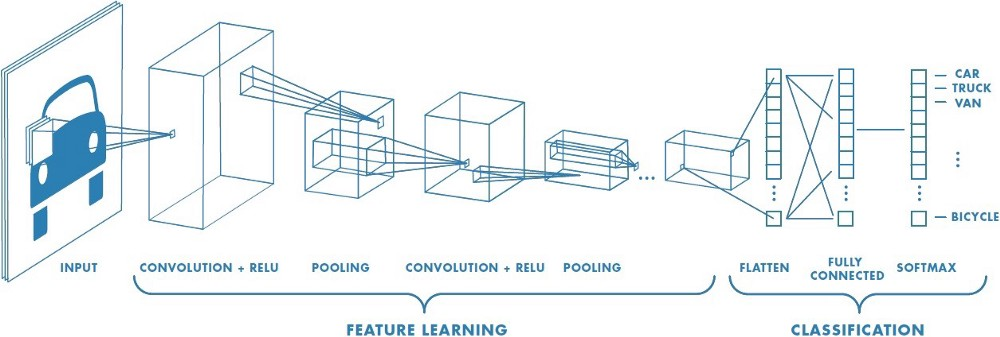

#INSTALL LIBRARY

In [78]:
!pip install keras-preprocessing

In [79]:
import pandas as pd
import numpy as np
import os, zipfile
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf

%matplotlib inline
from google.colab import files
from keras.preprocessing import image
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

#LOAD DATASETS

In [80]:
from google.colab import drive
import os

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [81]:
local_zip = '/content/drive/MyDrive/DATAMINING/DatasetsDaun.zip'
zip_Ref = zipfile.ZipFile(local_zip, 'r')
zip_Ref.extractall('/content/Datasets Daun')
zip_Ref.close()

In [82]:
pepaya = os.path.join('/content/Datasets Daun/DatasetsDaun/Datasets Daun/Pepaya')
nangka = os.path.join('/content/Datasets Daun/DatasetsDaun/Datasets Daun/Nangka')

print('Jumlah total gambar Pepaya:', len(os.listdir(pepaya)))
print('Jumlah total gambar Nangka:', len(os.listdir(nangka)))

Jumlah total gambar Pepaya: 170
Jumlah total gambar Nangka: 170


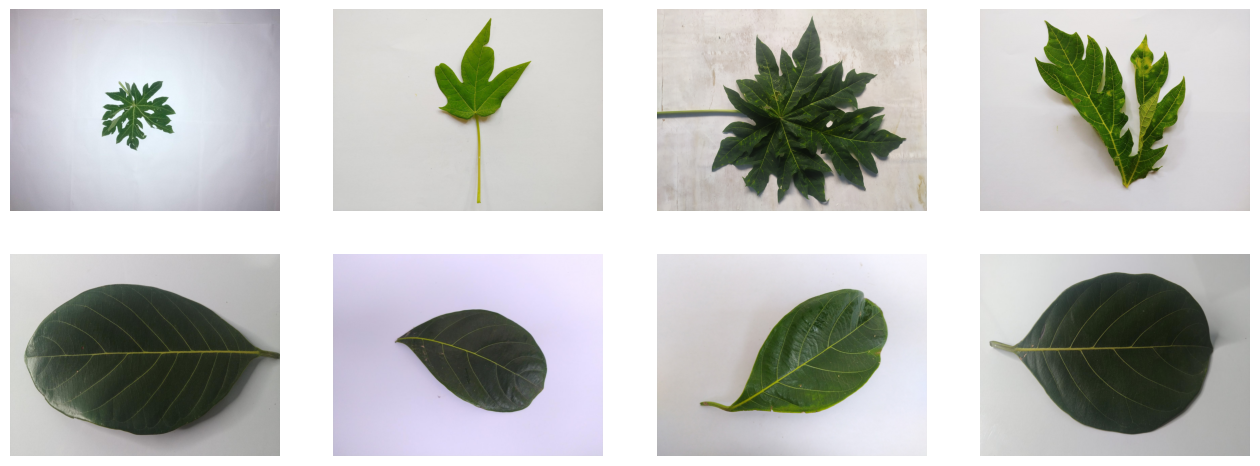

In [83]:
nrows = 3
ncols = 4

pic_index = 0

fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 3)

pic_index += 4
gbr_pepaya  = [os.path.join(pepaya, fname)
                      for fname in file_pepaya[pic_index-4:pic_index]]
gbr_nangka     = [os.path.join(nangka, fname)
                      for fname in file_nangka[pic_index-4:pic_index]]

for i, img_path in enumerate(gbr_pepaya+gbr_nangka):
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off')

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

#PREPROCESSING

In [84]:
training_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 20,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.3,
    zoom_range = 0.1,
    horizontal_flip = True,
    fill_mode = 'nearest',

    validation_split = 0.2
)

In [85]:
BASIS_DIR = ('/content/Datasets Daun/DatasetsDaun/Datasets Daun')

In [86]:
train_generator = training_datagen.flow_from_directory(
    BASIS_DIR,
    target_size = (100, 150),
    batch_size = 32,
    class_mode = 'categorical',
  shuffle=True,
  subset='training'
)

val_generator = training_datagen.flow_from_directory(
    BASIS_DIR,
    target_size = (100, 150),
    batch_size = 32,
    class_mode = 'categorical',
  shuffle=True,
  subset='validation'
)

Found 272 images belonging to 2 classes.
Found 68 images belonging to 2 classes.


#CNN MODEL

Input Gambar
*   Memasukan gambar dengan ukuran dimensi sebelumnya

Conv2D
*   Terdapat 4 Lapisan dengan 4 filter yang diterapkan pada gambar input
*   relu memperkenalkan non-linearitas ke dalam model dan membantu dalam pembelajaran fitur-fitur yang lebih kompleks.

Max Pooling
*   mereduksi dimensi spasial dari feature maps dan mempercepat komputasi

Flatten
*   mengubah tensor tiga dimensi menjadi vektor satu dimensi. Ini memungkinkan kita untuk menyuntikkan fitur-fitur yang diekstraksi ke dalam lapisan-lapisan fully connected.

Dense + softmax
*   menambahkan lapisan-lapisan fully connected ke dalam model untuk melakukan klasifikasi atau regresi berdasarkan fitur-fitur yang telah diekstraksi.





In [87]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (100, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(256, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation = 'relu'),
    tf.keras.layers.Dense(2, activation = 'softmax'),
])

In [88]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs = None):
    if(logs.get('accuracy') > 0.9):
      print('\n Akurasi mencapai 90%')
      self.model.stop_training = True

callbacks = myCallback()

In [89]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = tf.optimizers.Adam(),
              metrics = ['accuracy'])

In [90]:
history = model.fit(
    train_generator,
    steps_per_epoch = 9,
    epochs = 25,
    validation_data = val_generator,
    validation_steps = 1,
    verbose = 1,
    callbacks = [callbacks]
)

Epoch 1/25
9/9 [==============================] - 16s 2s/step - loss: 0.7034 - accuracy: 0.5699 - val_loss: 0.7969 - val_accuracy: 0.3750
Epoch 2/25
9/9 [==============================] - 14s 2s/step - loss: 0.4803 - accuracy: 0.7757 - val_loss: 0.6818 - val_accuracy: 0.6250
Epoch 3/25
9/9 [==============================] - 14s 2s/step - loss: 0.2549 - accuracy: 0.8787 - val_loss: 0.4571 - val_accuracy: 0.7812
Epoch 4/25
9/9 [==============================] - 14s 1s/step - loss: 0.3329 - accuracy: 0.8860 - val_loss: 0.5765 - val_accuracy: 0.8125
Epoch 5/25
9/9 [==============================] - ETA: 0s - loss: 0.2098 - accuracy: 0.9412
 Akurasi mencapai 90%
9/9 [==============================] - 14s 2s/step - loss: 0.2098 - accuracy: 0.9412 - val_loss: 0.7507 - val_accuracy: 0.6875


Saving download.jpg to download (8).jpg
1/1 [==============================] - 0s 27ms/step
download (8).jpg
Gambar ini sebuah daun NANGKA


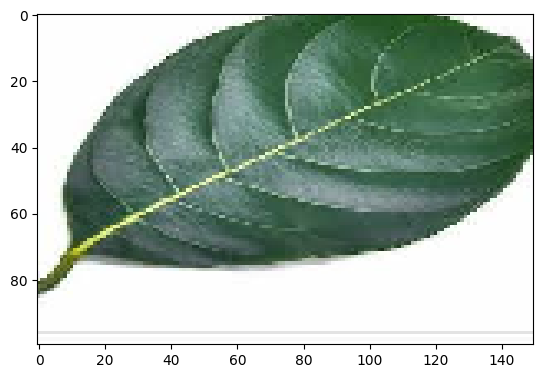

In [95]:
from keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
    path = fn
    img = image.load_img(path, target_size=(100, 150))
    imgplot = plt.imshow(img)
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    images = np.vstack([x])
    classes = model.predict(images, batch_size=10)
    print(fn)
    if classes[0][0] == 1:
        print('Gambar ini sebuah daun NANGKA')
    elif classes[0][1] == 1:
        print('Gambar ini sebuah daun PEPAYA')
    else:
        print('Tidak Diketahui')
